# Exploración y Recolección de Datos con Joins en Fórmula 1

Este notebook está diseñado para una clase práctica en la que se exploran y recolectan datos mediante la unión (_joins_) de múltiples datasets de Fórmula 1. El objetivo es analizar conjuntamente información procedente de diferentes orígenes para responder preguntas de negocio y obtener insights sobre la historia de la F1.

## Objetivos de la Clase

1. Comprender el uso de joins para combinar tablas utilizando claves comunes (por ejemplo, `raceId` y `driverId`).
2. Explorar la integración de datos provenientes de archivos distintos y su impacto en la información resultante.
3. Responder a preguntas de negocio como:
   - ¿Cuántos pilotos han participado en la F1?
   - ¿Cuál es el circuito que ha sido más utilizado?
   - ¿Qué piloto ha ganado más carreras?
   - ¿Qué piloto ha acumulado más puntos durante su carrera?
4. Interpretar gráficamente resultados y tendencias a lo largo del tiempo.

La idea es que, mediante el uso de operaciones join, los estudiantes unan y analicen datos de varias fuentes (por ejemplo, `races.csv`, `results.csv` y `drivers.csv`) para elaborar un análisis exploratorio completo.

In [2]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/f1stasts_1.zip
!unzip f1stasts_1.zip

--2025-05-02 06:16:30--  https://github.com/javierherrera1996/lecture_analytics/raw/main/f1stasts_1.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/f1stasts_1.zip [following]
--2025-05-02 06:16:30--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/f1stasts_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6183969 (5.9M) [application/zip]
Saving to: ‘f1stasts_1.zip’

f1stasts_1.zip      100%[===================>]   5.90M  --.-KB/s    in 0.09s   

2025-05-02 06:16:31 (64.5 MB/s) - ‘f1stasts_1.zip’ saved [6183969/6183969]



## 1. Carga y Exploración de los Datos

En esta sección se cargan y revisan brevemente los datasets principales:

- **races.csv:** Contiene detalles de cada carrera (año, circuito, fecha, etc.).
- **results.csv:** Registra los resultados de cada carrera (posición, puntos, vueltas, etc.).
- **drivers.csv:** Información sobre cada piloto (nombre, nacionalidad, fecha de nacimiento, etc.).

Asegúrate de tener estos archivos en tu entorno de trabajo.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## 2. Análisis Preliminar y Preparación de los Datos

Antes de realizar las uniones, es importante revisar las columnas clave de cada DataFrame:

- En **races_df** utilizaremos `raceId` para identificar la carrera.
- En **results_df** también se emplea `raceId` y `driverId` para enlazar resultados y pilotos.
- En **drivers_df** `driverId` es la clave para identificar a cada piloto.

Realiza un análisis exploratorio básico (conteos, tipos de dato, detección de nulos) para asegurarte de la calidad de la información.

In [4]:
race_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
drivers_df = pd.read_csv('drivers.csv')
constructores_df= pd.read_csv('constructors.csv')
temporadas_df= pd.read_csv('seasons.csv')

In [5]:
df_resultados = pd.merge(results_df,drivers_df,on='driverId',how="inner")
df_resultados

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url
0,1,18,1,1,22,1,1,1,1,10.0,...,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,18,2,2,3,5,2,2,2,8.0,...,217.586,1,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,...,216.719,1,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,18,4,4,5,11,4,4,4,5.0,...,215.464,1,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,18,5,1,23,3,5,5,5,4.0,...,218.385,1,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,227.169,1,ricciardo,3,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,228.213,1,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,229.415,1,hulkenberg,27,HUL,Nico,Hülkenberg,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,222.864,130,sainz,55,SAI,Carlos,Sainz,1994-09-01,Spanish,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.


In [6]:
df_constructores=constructores_df
df_constructores

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [7]:
df_seasons=temporadas_df
df_seasons

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...
...,...,...
69,2019,http://en.wikipedia.org/wiki/2019_Formula_One_...
70,2020,http://en.wikipedia.org/wiki/2020_Formula_One_...
71,2021,http://en.wikipedia.org/wiki/2021_Formula_One_...
72,2022,http://en.wikipedia.org/wiki/2022_Formula_One_...


In [8]:
df_este= df_f1 = pd.merge(df_resultados, df_constructores, on='constructorId', how="inner")
df_este

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,code,forename,surname,dob,nationality_x,url_x,constructorRef,name,nationality_y,url_y
0,1,18,1,1,22,1,1,1,1,10.0,...,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,18,2,2,3,5,2,2,2,8.0,...,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,18,3,3,7,7,3,3,3,6.0,...,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,18,4,4,5,11,4,4,4,5.0,...,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,18,5,1,23,3,5,5,5,4.0,...,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,HUL,Nico,Hülkenberg,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,SAI,Carlos,Sainz,1994-09-01,Spanish,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari


In [9]:
df_este.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number_x         26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

<ipython-input-10-1509bda31890>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=victorias_por_escuderia.index, y=victorias_por_escuderia.values, palette=f1_colors)
<ipython-input-10-1509bda31890>:12: UserWarning: 
The palette list has fewer values (5) than needed (47) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=victorias_por_escuderia.index, y=victorias_por_escuderia.values, palette=f1_colors)


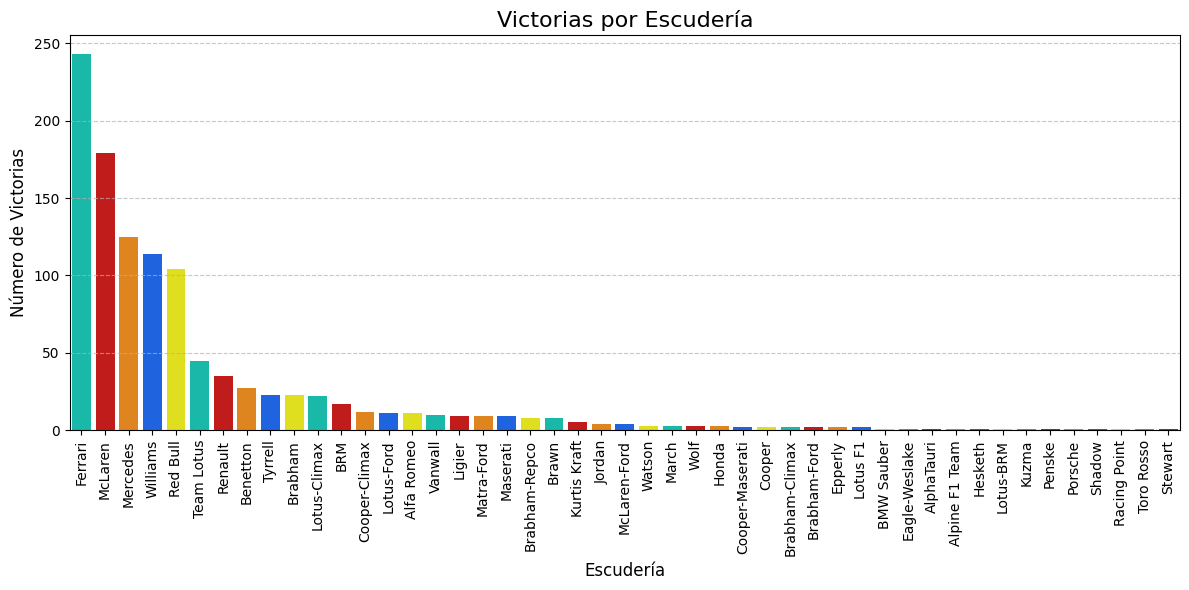

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a Formula 1 color palette
f1_colors = ['#00D2BE', '#DC0000', '#FF8700', '#005AFF', '#FFFF00']

# Agrupar por escudería y contar victorias (asumiendo que 'positionOrder' == 1 indica victoria)
victorias_por_escuderia = df_este[df_este['positionOrder'] == 1].groupby('name')['raceId'].count().sort_values(ascending=False)

# Gráfico de barras con la paleta de colores de la F1
plt.figure(figsize=(12, 6))
sns.barplot(x=victorias_por_escuderia.index, y=victorias_por_escuderia.values, palette=f1_colors)
plt.title('Victorias por Escudería', fontsize=16)
plt.xlabel('Escudería', fontsize=12)
plt.ylabel('Número de Victorias', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula sutil
plt.tight_layout()  # Ajustar el diseño para evitar recortes
plt.show()

In [11]:
!pip install squarify

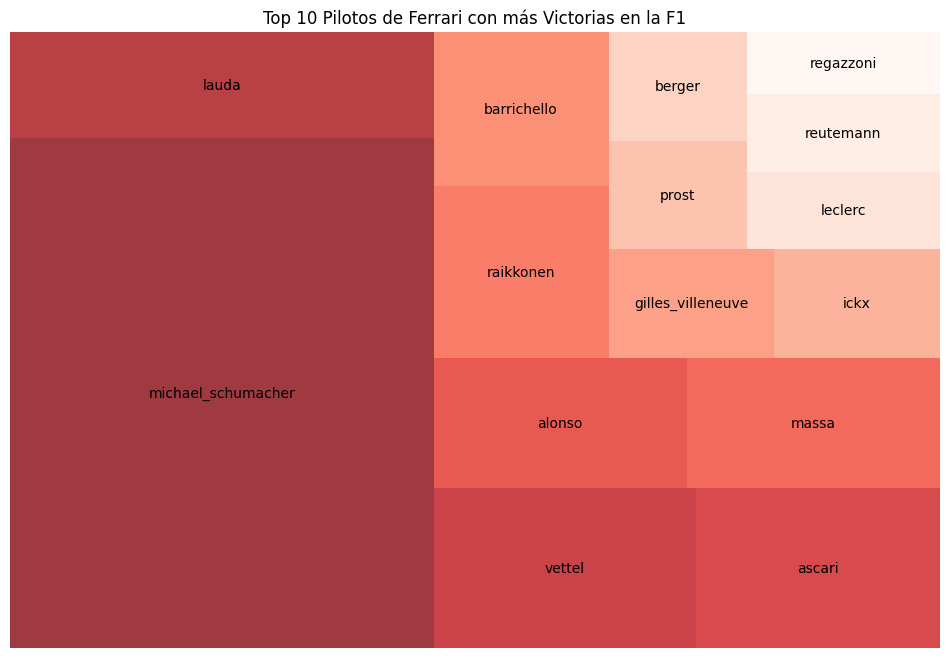

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify  # Import the squarify library
import pandas as pd

# Assuming df_este is your DataFrame with race results

# Filter for Ferrari drivers and group by driver to count wins
victorias_por_piloto = df_este[df_este['name'] == 'Ferrari'].groupby('driverRef')['positionOrder'].apply(lambda x: (x == 1).sum()).reset_index(name='Victorias')
victorias_por_piloto = victorias_por_piloto.sort_values(by=['Victorias'], ascending=False)
victorias_por_piloto = victorias_por_piloto.rename(columns={'driverRef': 'Piloto'})

# Get the top 10 drivers
top_drivers = victorias_por_piloto[:15]

labels = top_drivers['Piloto'].tolist()  # Get driver names
sizes = top_drivers['Victorias'].tolist()    # Get victory counts from 'Victorias' column
colors = [plt.cm.Reds(i / float(len(labels))) for i in range(len(labels))]
colors.reverse()  # Reverse the color order

# Create treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)  # Use custom colors
plt.title("Top 10 Pilotos de Ferrari con más Victorias en la F1")
plt.axis('off')  # Remove axis
plt.show()

In [13]:
# Assuming 'df_este' has information about constructors and their wins
# Replace this with your actual logic to identify the dominant constructor
df_escuderia_dominante = df_este[df_este['name'] == 'Ferrari'] # Example: Selecting Ferrari as the dominant constructor
df_escuderia_dominante

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,code,forename,surname,dob,nationality_x,url_x,constructorRef,name,nationality_y,url_y
7,8,18,8,6,1,15,8,8,8,1.0,...,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
12,13,18,13,6,2,4,\N,R,13,0.0,...,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
22,23,19,8,6,1,2,1,1,1,10.0,...,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
40,41,19,13,6,2,1,\N,R,19,0.0,...,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
44,45,20,13,6,2,2,1,1,1,10.0,...,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26029,26035,1108,832,6,55,5,10,10,10,1.0,...,SAI,Carlos,Sainz,1994-09-01,Spanish,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
26046,26052,1109,844,6,16,6,7,7,7,6.0,...,LEC,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
26047,26053,1109,832,6,55,11,8,8,8,4.0,...,SAI,Carlos,Sainz,1994-09-01,Spanish,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
26062,26068,1110,844,6,16,1,3,3,3,15.0,...,LEC,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari


In [14]:
# Contar pilotos por nacionalidad
nacionalidades_pilotosferrari = df_escuderia_dominante['nationality_x'].value_counts().head(10)

In [15]:
nacionalidades_pilotosferrari

,count
nationality_x,
German,328
Italian,309
Brazilian,245
French,239
British,221
Finnish,158
Spanish,158
Austrian,154
Monegasque,94


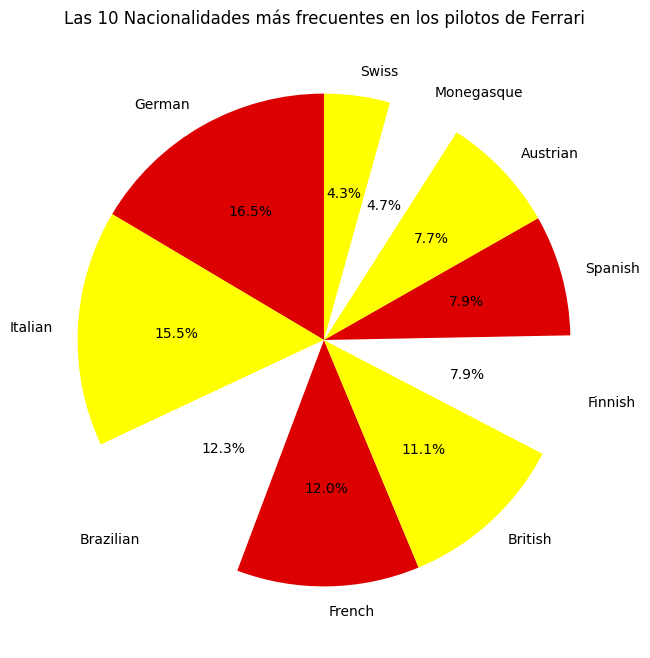

In [16]:
ferrari_colors = ['#DC0000', '#FFFF00', '#FFFFFF', '#DC0000', '#FFFF00', '#FFFFFF','#DC0000', '#FFFF00', '#FFFFFF', '#FFFF00']

plt.figure(figsize=(8, 8))
plt.pie(nacionalidades_pilotosferrari.values, labels=nacionalidades_pilotosferrari.index, autopct='%1.1f%%', startangle=90, colors=ferrari_colors)
plt.title('Las 10 Nacionalidades más frecuentes en los pilotos de Ferrari')
plt.show()

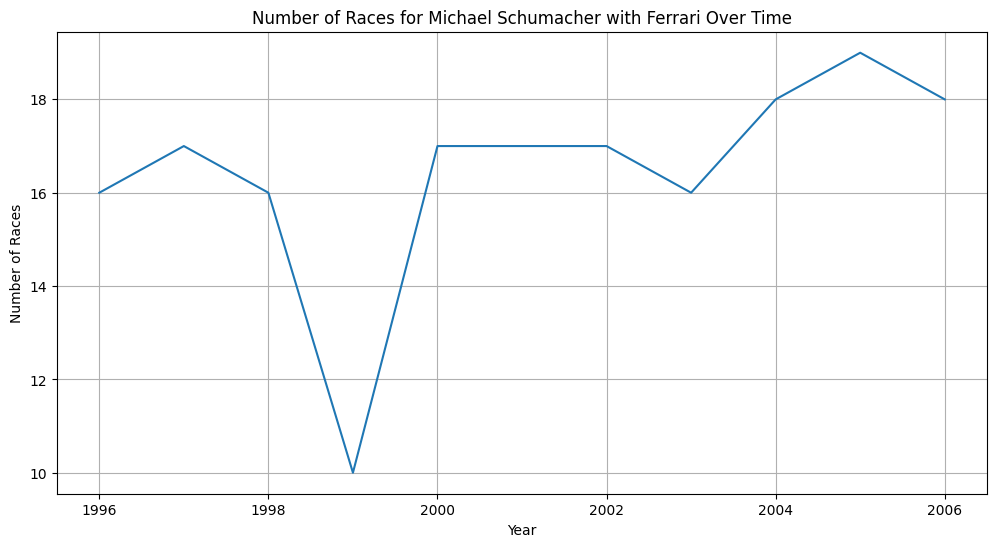

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_este is your merged dataframe and contains the necessary columns
# Filter for Michael Schumacher and Ferrari
schumacher_ferrari_races = df_este[(df_este['driverRef'] == 'michael_schumacher') & (df_este['name'] == 'Ferrari')]

# Merge with race_df to get the 'year' column
schumacher_ferrari_races = pd.merge(schumacher_ferrari_races, race_df[['raceId', 'year']], on='raceId', how='left')

# Group by year and count races
races_per_year = schumacher_ferrari_races.groupby('year')['raceId'].count().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='raceId', data=races_per_year)  # Use seaborn for a nicer plot
plt.title('Number of Races for Michael Schumacher with Ferrari Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.grid(True)
plt.show()

In [18]:
# Filter df_este for races with Schumacher and Ferrari in 1999
# First, merge with race_df to get the 'year' column
df_este_with_year = pd.merge(df_este, race_df[['raceId', 'year']], on='raceId', how='left')

# Now filter using the merged DataFrame
races_1999 = df_este_with_year[
    (df_este_with_year['driverRef'] == 'michael_schumacher') &
    (df_este_with_year['name'] == 'Ferrari') &
    (df_este_with_year['year'] == 1999)
]

# Print the number of races found
print(f"Number of races for Schumacher with Ferrari in 1999: {len(races_1999)}")

# Optionally, display the DataFrame to inspect the data
display(races_1999)

Number of races for Schumacher with Ferrari in 1999: 10


,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,forename,surname,dob,nationality_x,url_x,constructorRef,name,nationality_y,url_y,year
3310,3311,175,30,6,3,3,8,8,8,0.0,...,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,1999
3326,3327,176,30,6,3,4,2,2,2,6.0,...,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,1999
3347,3348,177,30,6,3,3,1,1,1,10.0,...,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,1999
3369,3370,178,30,6,3,2,1,1,1,10.0,...,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,1999
3393,3394,179,30,6,3,4,3,3,3,4.0,...,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,1999
3427,3428,180,30,6,3,1,\N,R,15,0.0,...,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,1999
3439,3440,181,30,6,3,6,5,5,5,2.0,...,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,1999
3478,3479,182,30,6,3,2,\N,R,22,0.0,...,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,1999
3612,3613,189,30,6,3,1,2,2,2,6.0,...,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,1999
3634,3635,190,30,6,3,1,2,2,2,6.0,...,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,1999


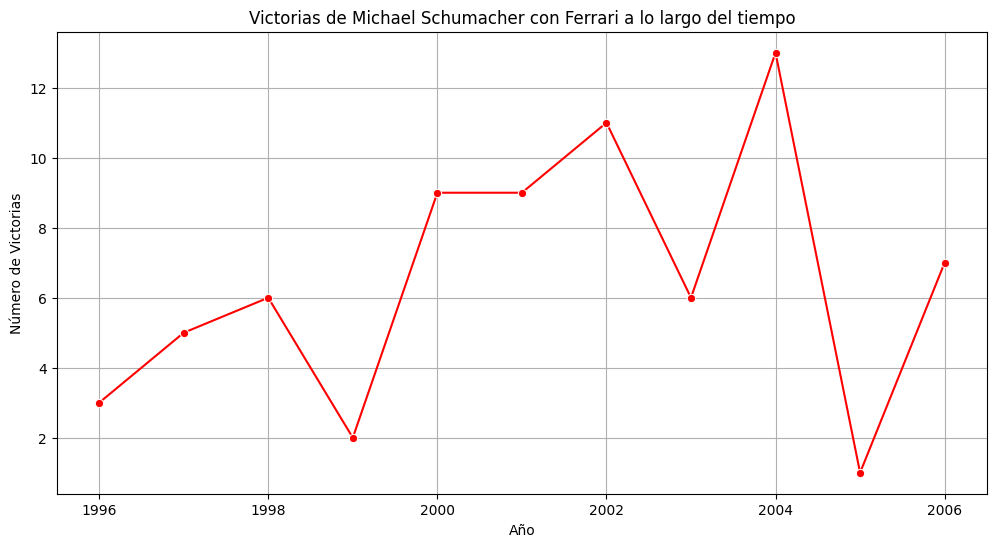

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have df_este and race_df loaded

# Filter for Michael Schumacher and Ferrari races where positionOrder is 1 (indicating a win)
schumacher_ferrari_wins = df_este[
    (df_este['driverRef'] == 'michael_schumacher') &
    (df_este['name'] == 'Ferrari') &
    (df_este['positionOrder'] == 1)
]

# Merge with race_df to get the 'year' column
schumacher_ferrari_wins = pd.merge(schumacher_ferrari_wins, race_df[['raceId', 'year']], on='raceId', how='left')

# Group by year and count wins
wins_per_year = schumacher_ferrari_wins.groupby('year')['raceId'].count().reset_index()

# Create the line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='raceId', data=wins_per_year, marker='o', color='red')
plt.title('Victorias de Michael Schumacher con Ferrari a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Victorias')
plt.grid(True)
plt.show()

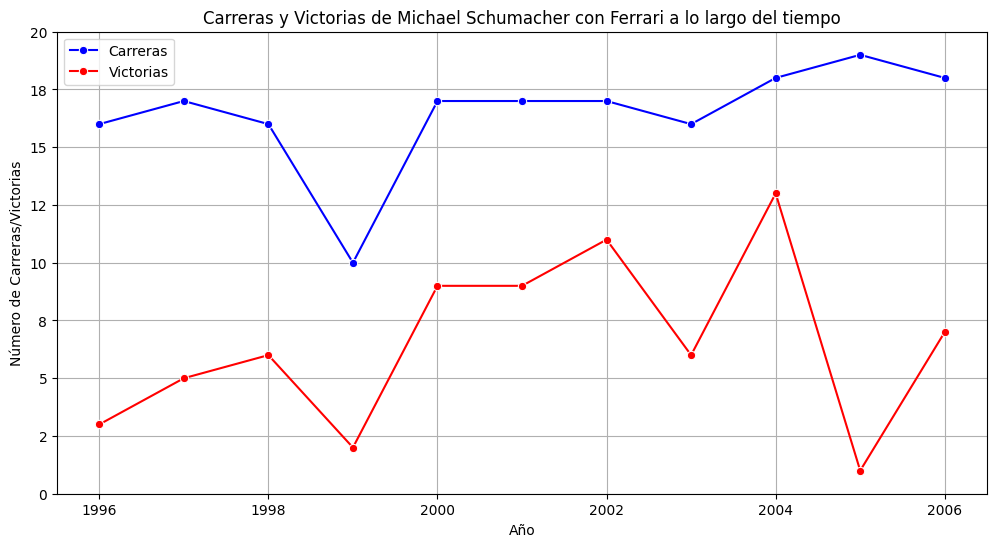

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumiendo que ya tienes los DataFrames df_este y race_df cargados

# Filtrar para las carreras de Michael Schumacher con Ferrari
schumacher_ferrari_races = df_este[
    (df_este['driverRef'] == 'michael_schumacher') &
    (df_este['name'] == 'Ferrari')
]

# Unir con race_df para obtener la columna 'year'
schumacher_ferrari_races = pd.merge(
    schumacher_ferrari_races, race_df[['raceId', 'year']], on='raceId', how='left'
)

# Agrupar por año y contar carreras
races_per_year = schumacher_ferrari_races.groupby('year')['raceId'].count().astype(int).reset_index()  # Convert to int

# Agrupar por año y contar victorias (positionOrder == 1)
wins_per_year = schumacher_ferrari_races[
    schumacher_ferrari_races['positionOrder'] == 1
].groupby('year')['raceId'].count().astype(int).reset_index()  # Convert to int

# Crear el gráfico comparativo
plt.figure(figsize=(12, 6))

# Línea para el número de carreras
sns.lineplot(
    x='year',
    y='raceId',
    data=races_per_year,
    marker='o',
    color='blue',
    label='Carreras',
)

# Línea para el número de victorias
sns.lineplot(
    x='year',
    y='raceId',
    data=wins_per_year,
    marker='o',
    color='red',
    label='Victorias',
)

plt.title('Carreras y Victorias de Michael Schumacher con Ferrari a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Carreras/Victorias')
plt.grid(True)
plt.legend()  # Mostrar leyenda para identificar las líneas

# Redondear y configurar las etiquetas del eje y
y_ticks = plt.yticks()[0]  # Obtener las posiciones de las etiquetas actuales
plt.yticks(y_ticks, np.round(y_ticks).astype(int))  # Redondear y establecer como etiquetas

plt.show()